In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;

from sklearn.cluster import KMeans;
from sklearn.decomposition import PCA;

from kmeans import KMeans as OurKMeans; # Our implementation of kmeans

## 1. Load data

In [2]:
# Load dataset
iris = pd.read_csv('data/iris.data', delimiter=',', names=['a', 'b', 'c', 'd', 'class']);
moons = pd.read_csv('data/moons.csv', delimiter=',');
biclusters = pd.read_csv('data/biclusters.csv', delimiter=',');
circles = pd.read_csv('data/circles.csv', delimiter=',');
aniso = pd.read_csv('data/aniso.csv', delimiter=',');
blobs = pd.read_csv('data/blobs.csv', delimiter=',');

In [3]:
# Parameters
datasets = [ (iris, {'n_cluster':2, 'name':'iris'}),
             (moons, {'n_cluster':2, 'name':'moons'}),
             (biclusters, {'n_cluster':2, 'name':'biclusters'}),
             (circles, {'n_cluster':2, 'name':'circles'}),
             (aniso, {'n_cluster':2, 'name':'aniso'}),
             (blobs, {'n_cluster':4, 'name':'blobs'})
           ]

In [4]:
# Function to plot labels
def plot(X, sk_labels, our_labels):
   
    global j;
    all_labels = [sk_labels, our_labels];
    plt.figure(1, figsize=(12, 25));
    
    for labels in all_labels:
        plt.subplot(6, 2, j);
        plt.scatter(X[:, 0], X[:, 1], c=labels);       
        if j == 1:
            plt.title('Sklearn k-means');
        elif j == 2:
            plt.title('Our k-means');
        j = j + 1;
    plt.show();

## 2. K-means

In [5]:
global j;
j=1;

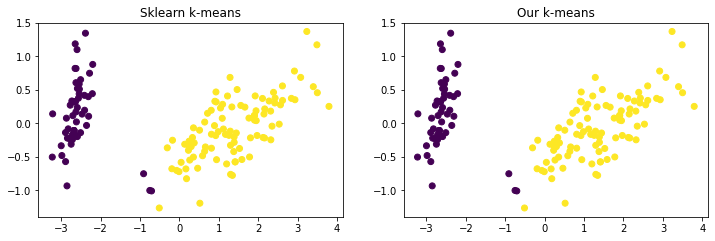

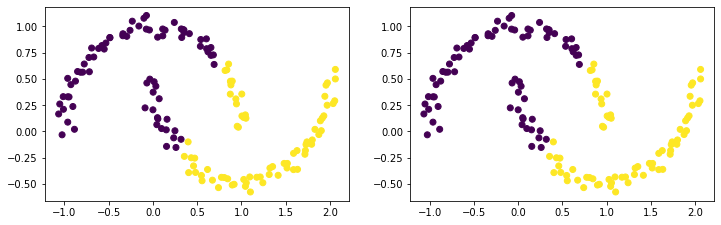

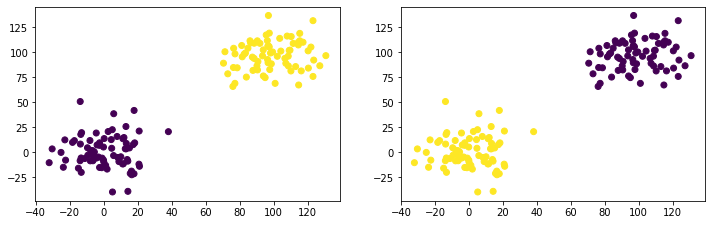

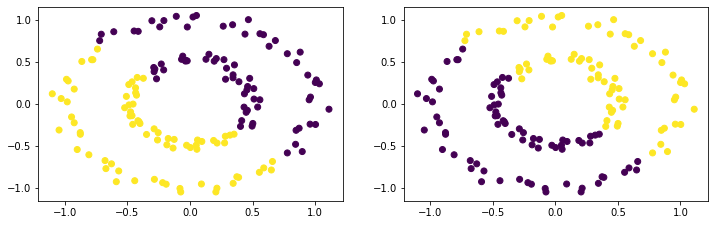

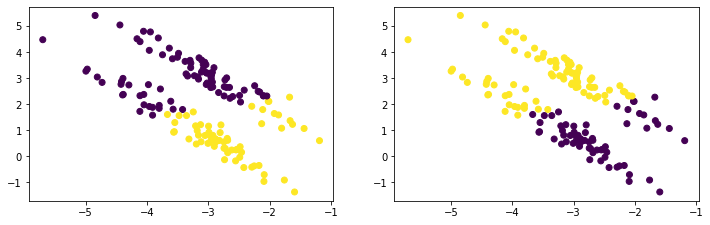

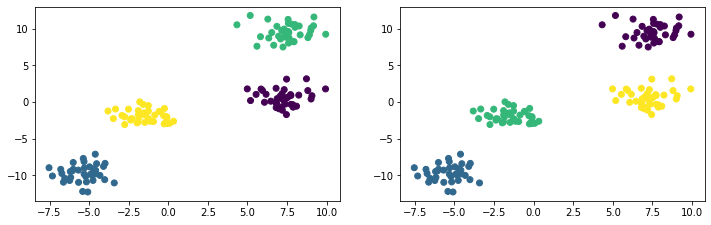

In [6]:
for data in datasets:
    
    if data[1]['name'] == 'iris':
        X = data[0][['a', 'b', 'c', 'd']].values;
        our_msg = OurKMeans(n_clusters=data[1]['n_cluster'], n_init=100, n_iter=100, seed=2);
        sk_msg = KMeans(n_clusters=data[1]['n_cluster'], n_init=100, max_iter=100, random_state=2);
    else:
        X = data[0][['x', 'y']].values;
        our_msg = OurKMeans(n_clusters=data[1]['n_cluster'], n_init=100, n_iter=100, seed=2);
        sk_msg = KMeans(n_clusters=data[1]['n_cluster'], n_init=100, max_iter=100, random_state=2);
    
    # Fit
    our_msg.fit(X);
    sk_msg.fit(X);
    
    # Plot
    if data[1]['name'] == 'iris':
        pca = PCA(n_components=2);
        X = pca.fit_transform(data[0][['a', 'b', 'c', 'd']].values);
    
    plot(X, sk_msg.labels_, our_msg.labels_);